In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load Spotify dataset
df = pd.read_csv('Resources/spotify_songs.csv')

# Display the first 5 rows
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
# Drop unnecessary columns
columns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 
                   'track_album_name', 'playlist_name', 'playlist_id', 
                   'track_album_release_date', 'playlist_genre', 'playlist_subgenre']
df_clean = df.drop(columns=columns_to_drop)

# Drop tracks with no popularity data
df_clean = df_clean[df_clean['track_popularity'] != 0]

# Display missing values
print("Missing values:\n", df_clean.isnull().sum())


Missing values:
 track_popularity    0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64


In [7]:
# Categorize track_popularity into tiers: Low (0-31), Medium (32-63), High (64-100)
df_clean['popularity_tier'] = pd.cut(
    df_clean['track_popularity'],
    bins=[0, 31, 63, 100],
    labels=['Low', 'Medium', 'High']
)

# Drop the original track_popularity column
df_clean.drop(columns=['track_popularity'], inplace=True)

# Display the first 5 rows of the updated DataFrame
df_clean.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_tier
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,High
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,High
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,High
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,Medium
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,High


In [8]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 
                      'tempo', 'duration_ms']

df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

# Display the first 5 rows of the scaled data
df_clean.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_tier
0,0.633759,1.225232,6,1.372835,1,-0.480358,-0.350586,-0.367740,-0.810392,0.034144,0.045122,-0.496458,High
1,0.482089,0.666977,11,0.588892,1,-0.688063,-0.484224,-0.348567,1.114661,0.787747,-0.770972,-1.043914,High
2,0.130490,1.308141,1,1.104918,0,-0.323096,-0.452620,-0.367634,-0.515397,0.443243,0.118061,-0.805277,High
3,0.426936,1.302613,7,0.988753,1,-0.048135,-0.681522,-0.367698,0.104949,-1.003676,0.042163,-0.933364,Medium
4,-0.041863,0.766468,1,0.688606,1,-0.701910,-0.448557,-0.367740,-0.691602,0.925549,0.116878,-0.593541,High


In [9]:
# Define features (X) and target (y)
X = df_clean.drop(columns=['popularity_tier'])
y = df_clean['popularity_tier']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the distribution of target variable in training and testing sets
print("Training set distribution:\n", y_train.value_counts())
print("\nTesting set distribution:\n", y_test.value_counts())


Training set distribution:
 popularity_tier
Medium    12004
Low        6102
High       5998
Name: count, dtype: int64

Testing set distribution:
 popularity_tier
Medium    3001
Low       1526
High      1499
Name: count, dtype: int64


In [10]:
# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.5174


In [11]:
# Train a Logistic Regression model
log_model = LogisticRegression(multi_class='multinomial', max_iter=200, random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
log_predictions = log_model.predict(X_test)

# Evaluate the model
log_accuracy = accuracy_score(y_test, log_predictions)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")


Logistic Regression Accuracy: 0.5008


In [12]:
# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

rf_grid_search.fit(X_train, y_train)

# Evaluate best model
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Optimized Random Forest Accuracy: {rf_accuracy:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Optimized Random Forest Accuracy: 0.6454


Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.81      0.57      0.67      1499
         Low       0.59      0.20      0.30      1526
      Medium       0.61      0.91      0.73      3001

    accuracy                           0.65      6026
   macro avg       0.67      0.56      0.57      6026
weighted avg       0.66      0.65      0.61      6026



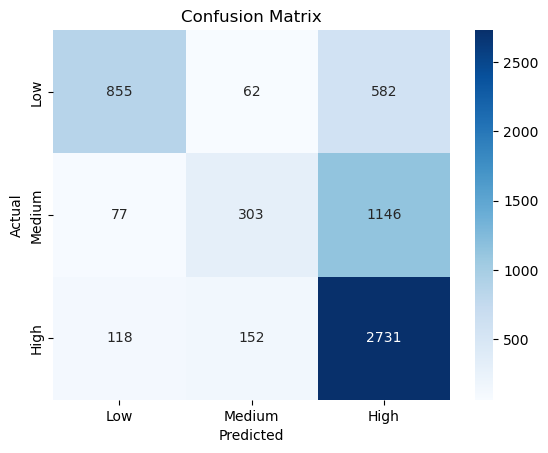

In [13]:
# Print classification report for the best-performing model
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Compare the accuracy of all models
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"Optimized Random Forest Accuracy: {rf_accuracy:.4f}")


Gradient Boosting Accuracy: 0.5174
Logistic Regression Accuracy: 0.5008
Optimized Random Forest Accuracy: 0.6454


C:\Users\Mom\AppData\Local\Temp\ipykernel_28176\531416418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='popularity_tier', palette='coolwarm', order=['Low', 'Medium', 'High'])


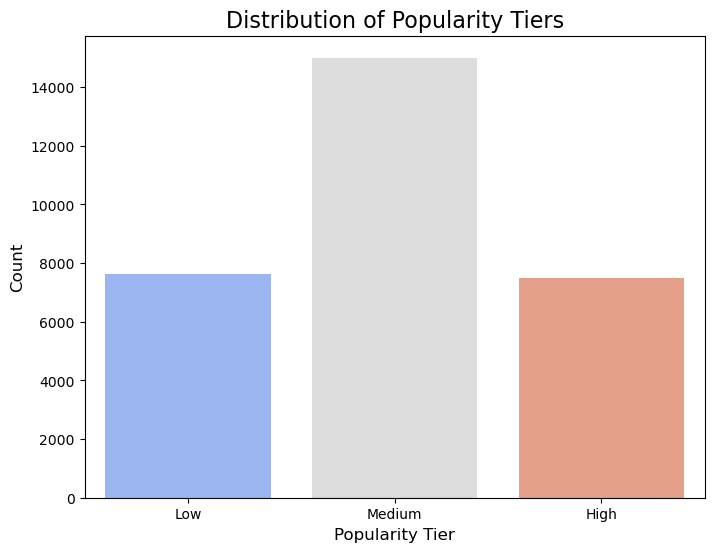

In [16]:
# Plot the distribution of popularity tiers in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='popularity_tier', palette='coolwarm', order=['Low', 'Medium', 'High'])
plt.title('Distribution of Popularity Tiers', fontsize=16)
plt.xlabel('Popularity Tier', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


C:\Users\Mom\AppData\Local\Temp\ipykernel_28176\2954064912.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')


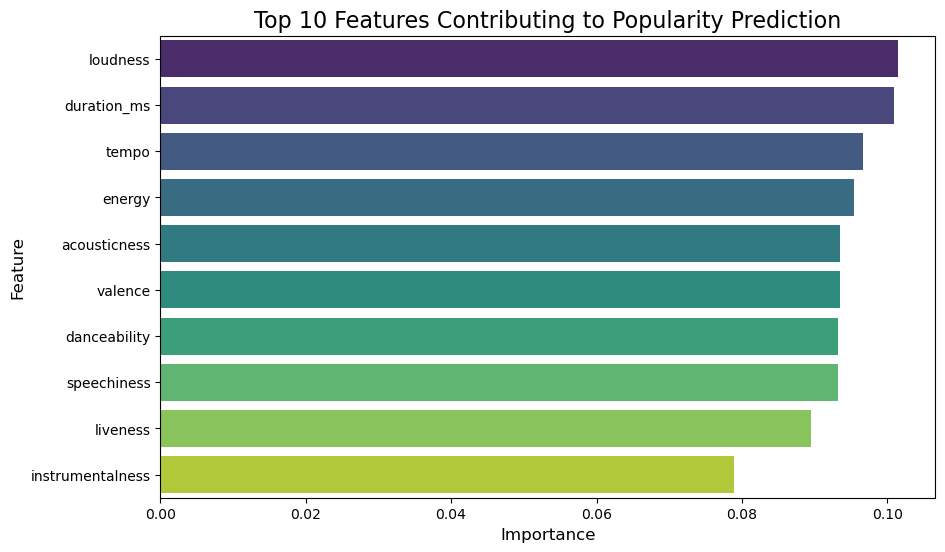

In [17]:
# Extract feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Contributing to Popularity Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


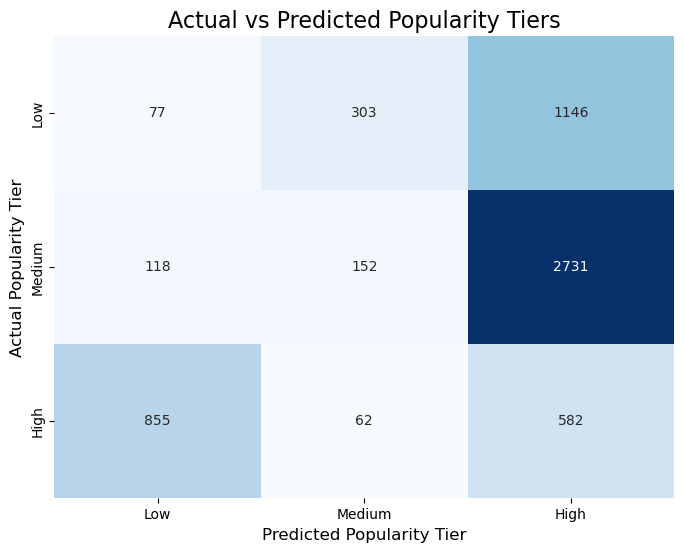

In [18]:
# Create a DataFrame for actual vs predicted values
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_predictions
})

# Plot actual vs predicted popularity tiers
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(actual_vs_predicted['Actual'], actual_vs_predicted['Predicted']),
            annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Actual vs Predicted Popularity Tiers', fontsize=16)
plt.xlabel('Predicted Popularity Tier', fontsize=12)
plt.ylabel('Actual Popularity Tier', fontsize=12)
plt.show()


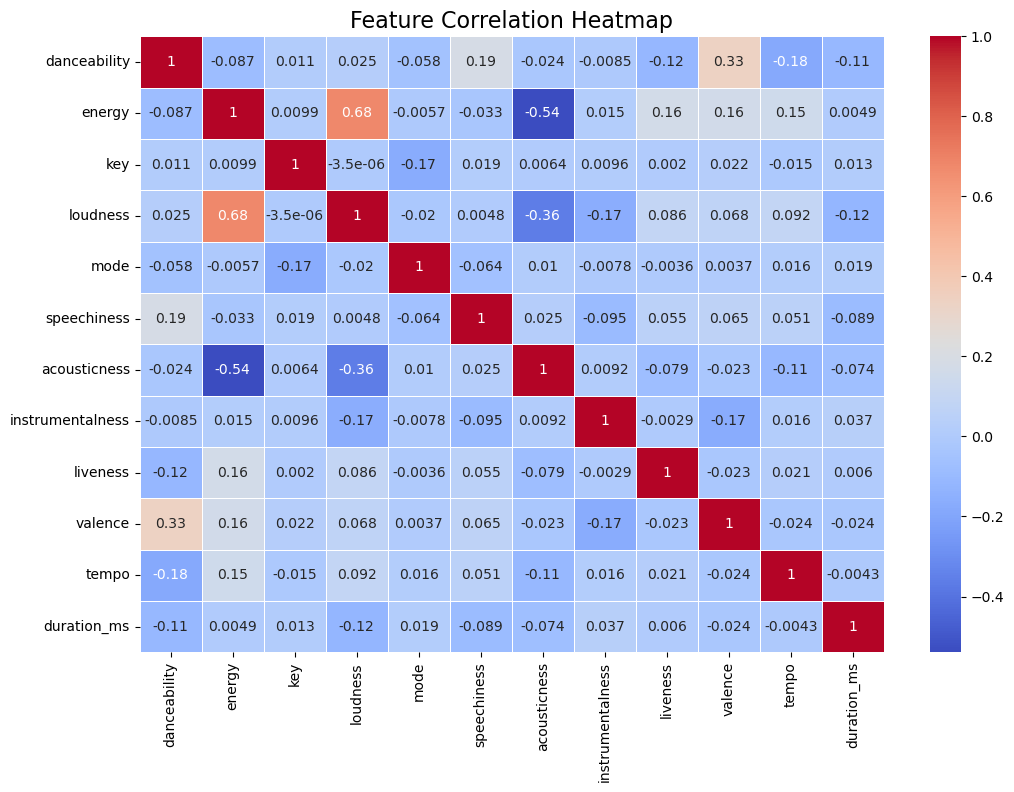

In [20]:
# Drop non-numeric columns to compute the correlation matrix
numeric_features_df = df_clean.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_features_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


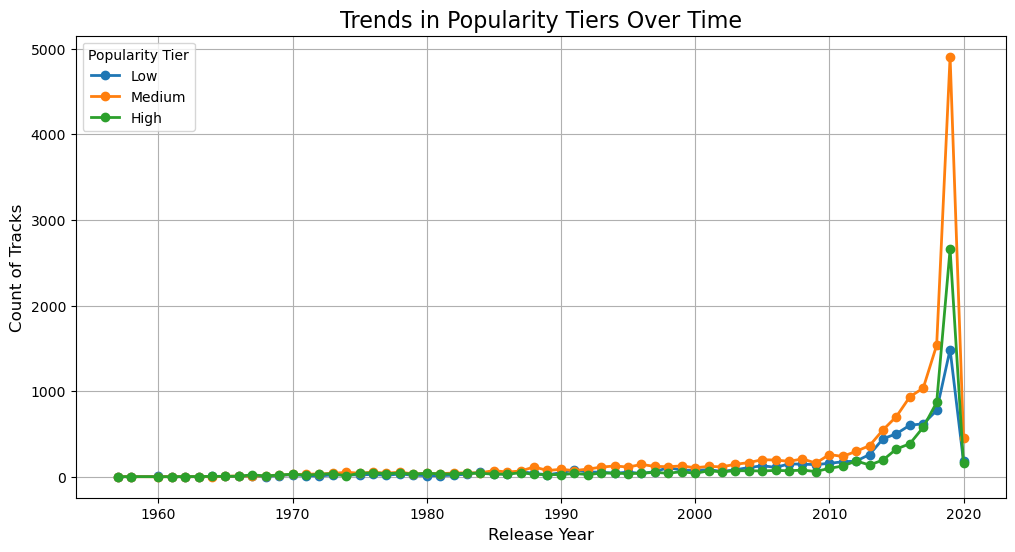

In [21]:
# Group data by release year and calculate the average popularity for each tier
df_clean['release_year'] = df['track_album_release_date'].str[:4].astype(float)
popularity_over_time = df_clean.groupby('release_year')['popularity_tier'].value_counts().unstack().fillna(0)

# Plot popularity trends over time
popularity_over_time.plot(kind='line', figsize=(12, 6), marker='o', linewidth=2)
plt.title('Trends in Popularity Tiers Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count of Tracks', fontsize=12)
plt.legend(title='Popularity Tier', fontsize=10)
plt.grid()
plt.show()


In [22]:
# Add predictions back to the original dataset for future use
df_clean['Predicted Popularity Tier'] = rf_best_model.predict(X)

# Display the first 5 rows
df_clean[['danceability', 'energy', 'Predicted Popularity Tier']].head()


,danceability,energy,Predicted Popularity Tier
0,0.633759,1.225232,High
1,0.482089,0.666977,High
2,0.130490,1.308141,High
3,0.426936,1.302613,Medium
4,-0.041863,0.766468,Medium
